<a href="https://colab.research.google.com/github/Tstrebe2/predicting-text-difficulty/blob/tim-updates/code/tim-initial-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial EDA Notebook

# Import Notebook Dependencies

In [21]:
import missingno as msno
import pandas as pd
import requests

# Supplemental Dataset Descriptions

In [ ]:
read_me_url = 'https://raw.githubusercontent.com/Tstrebe2/predicting-text-difficulty/main/assets/additional_resource_file_readme.txt'

print(requests.get(read_me_url).text)


== dale_chall.txt ==

This is the Dale Chall 3000 Word List, which is one definition of words that are considered "basic" English.
A summary is at https://www.readabilityformulas.com/articles/dale-chall-readability-word-list.php


== Concreteness_ratings_Brysbaert_et_al_BRM.txt ==

This file contains concreteness ratings for 40 thousand English lemma words gathered via Amazon Mechanical Turk. The ratings come from a larger list of 63 thousand words and represent all English words known to 85% of the raters.

The file contains eight columns:
1. The word
2. Whether it is a single word or a two-word expression 
3. The mean concreteness rating
4. The standard deviation of the concreteness ratings
5. The number of persons indicating they did not know the word
6. The total number of persons who rated the word
7. Percentage participants who knew the word
8. The SUBTLEX-US frequency count (on a total of 51 million; Brysbaert & New, 2009) 
9. The dominant part-of-speech usage

Original source:

# Load Datasets

In [22]:
urls = ['https://raw.githubusercontent.com/Tstrebe2/predicting-text-difficulty/main/assets/dale_chall.txt',
        'https://raw.githubusercontent.com/Tstrebe2/predicting-text-difficulty/main/assets/Concreteness_ratings_Brysbaert_et_al_BRM.txt',
        'https://raw.githubusercontent.com/Tstrebe2/predicting-text-difficulty/main/assets/AoA_51715_words.csv',
        'https://raw.githubusercontent.com/Tstrebe2/predicting-text-difficulty/main/assets/WikiLarge_Train.csv',
        'https://raw.githubusercontent.com/Tstrebe2/predicting-text-difficulty/main/assets/WikiLarge_Test.csv',
        'https://raw.githubusercontent.com/Tstrebe2/predicting-text-difficulty/main/assets/sampleSubmission.csv']

d_chall = requests.get(urls[0]).text.split('\r')
conc_df = pd.read_csv(urls[1], sep='\t')
aoa_df = pd.read_csv(urls[2], encoding_errors='ignore')

wiki_df_train = pd.read_csv(urls[3])
# The labels column is purely null values so I'm going to throw it away
wiki_df_test = pd.read_csv(urls[4], usecols=['id', 'original_text']).set_index('id')
sample_df = pd.read_csv(urls[5]).set_index('id')

### Dale Chall 3000 Word List

In [ ]:
# It seems we are missing 50 words
print('List length:', len(d_chall))
print('First 10 words:', d_chall[:10])
print('Last 10 words:',d_chall[-10:])

List length: 2950
First 10 words: ['a', 'able', 'aboard', 'about', 'above ', 'absent ', 'accept ', 'accident ', 'account ', 'ache ']
Last 10 words: ["you'll", 'young', 'youngster', 'your', 'yours', "you're", 'yourself', 'yourselves', 'youth', "you've"]


### Concreteness Ratings

In [ ]:
conc_df

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos
0,roadsweeper,0,4.85,0.37,1,27,0.96,0,0
1,traindriver,0,4.54,0.71,3,29,0.90,0,0
2,tush,0,4.45,1.01,3,25,0.88,66,0
3,hairdress,0,3.93,1.28,0,29,1.00,1,0
4,pharmaceutics,0,3.77,1.41,4,26,0.85,0,0
...,...,...,...,...,...,...,...,...,...
39949,unenvied,0,1.21,0.62,1,30,0.97,0,NaN
39950,agnostically,0,1.20,0.50,2,27,0.93,0,NaN
39951,conceptualistic,0,1.18,0.50,4,26,0.85,0,NaN
39952,conventionalism,0,1.18,0.48,1,29,0.97,0,NaN


In [ ]:
conc_df.dtypes

Word              object
Bigram             int64
Conc.M           float64
Conc.SD          float64
Unknown            int64
Total              int64
Percent_known    float64
SUBTLEX            int64
Dom_Pos           object
dtype: object

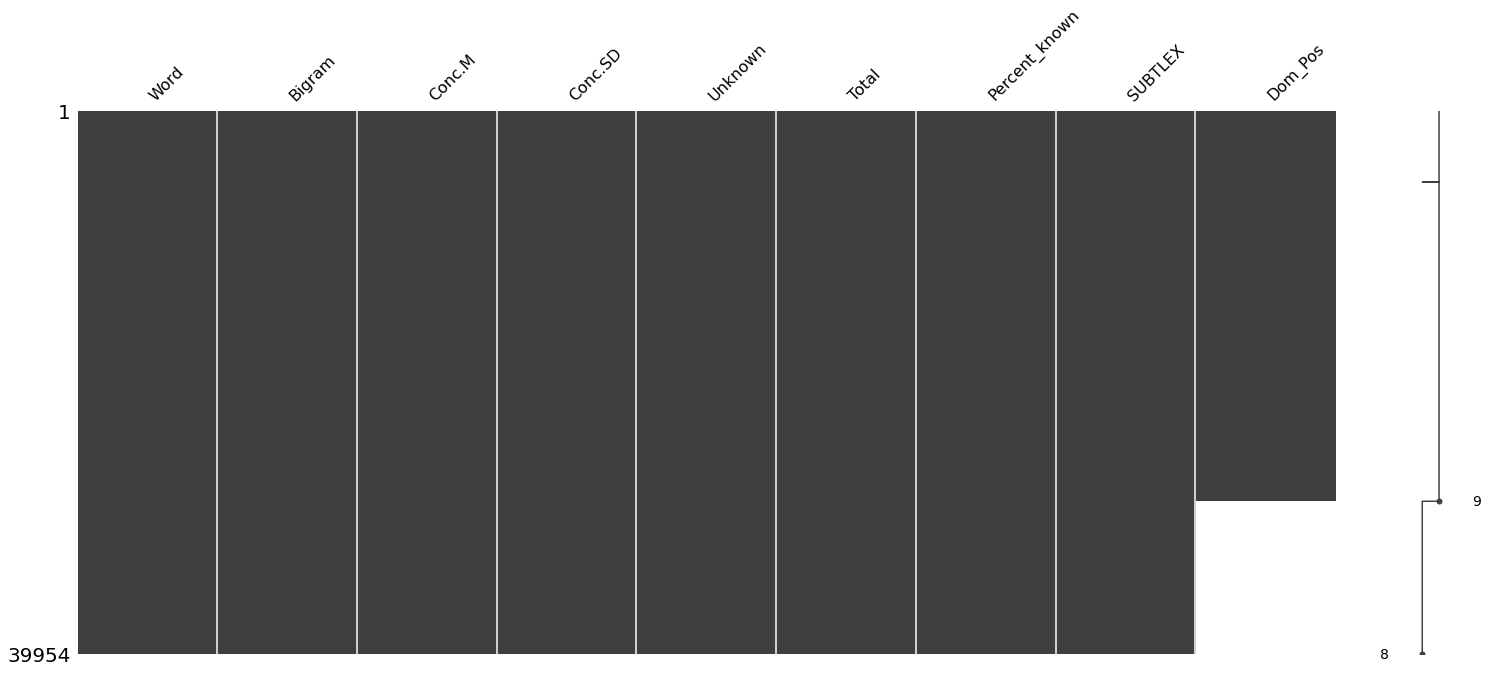

In [ ]:
msno.matrix(conc_df)

In [26]:
conc_df.describe(include='all')

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos
count,39953,39954.000000,39954.000000,39954.000000,39954.000000,39954.000000,39954.000000,3.995400e+04,28707
unique,39953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
top,roadsweeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14592
mean,NaN,0.072483,3.036267,1.148359,0.999825,33.195450,0.965562,1.077803e+03,NaN
std,NaN,0.259290,1.038602,0.310931,3.745465,174.829539,0.045009,2.242037e+04,NaN
min,NaN,0.000000,1.040000,0.000000,0.000000,21.000000,0.850000,0.000000e+00,NaN
25%,NaN,0.000000,2.120000,1.000000,0.000000,27.000000,0.930000,0.000000e+00,NaN
50%,NaN,0.000000,2.880000,1.210000,0.000000,28.000000,1.000000,1.000000e+01,NaN
75%,NaN,0.000000,3.890000,1.370000,2.000000,29.000000,1.000000,6.700000e+01,NaN


### Age of Acquisition

In [ ]:
aoa_df

,Word,Alternative.spelling,Freq_pm,Dom_PoS_SUBTLEX,Nletters,Nphon,Nsyll,Lemma_highest_PoS,AoA_Kup,Perc_known,AoA_Kup_lem,Perc_known_lem,AoA_Bird_lem,AoA_Bristol_lem,AoA_Cort_lem,AoA_Schock
0,a,a,20415.27,Article,1,1,1,a,2.89,1.00,2.89,1.00,3.16,NaN,NaN,NaN
1,aardvark,aardvark,0.41,Noun,8,7,2,aardvark,9.89,1.00,9.89,1.00,NaN,NaN,NaN,NaN
2,abacus,abacus,0.24,Noun,6,6,3,abacus,8.69,0.65,8.69,0.65,NaN,NaN,NaN,NaN
3,abacuses,abacuses,0.02,Noun,8,9,4,abacus,NaN,NaN,8.69,0.65,NaN,NaN,NaN,NaN
4,abalone,abalone,0.51,Verb,7,7,4,abalone,12.23,0.72,12.23,0.72,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51710,zucchini,zucchini,0.96,Noun,8,6,3,zucchini,8.57,1.00,6.79,1.00,NaN,NaN,NaN,NaN
51711,zucchinis,zucchinis,0.04,Noun,9,7,3,zucchini,NaN,NaN,6.79,1.00,NaN,NaN,NaN,NaN
51712,zwieback,zwieback,0.04,Noun,8,6,2,zwieback,16.10,0.53,16.10,0.53,NaN,NaN,NaN,NaN
51713,zygote,zygote,0.14,Noun,6,5,2,zygote,15.38,0.91,15.38,0.91,NaN,NaN,NaN,NaN


In [ ]:
aoa_df.dtypes

Word                     object
Alternative.spelling     object
Freq_pm                 float64
Dom_PoS_SUBTLEX          object
Nletters                  int64
Nphon                     int64
Nsyll                     int64
Lemma_highest_PoS        object
AoA_Kup                 float64
Perc_known              float64
AoA_Kup_lem             float64
Perc_known_lem          float64
AoA_Bird_lem            float64
AoA_Bristol_lem         float64
AoA_Cort_lem            float64
AoA_Schock              float64
dtype: object

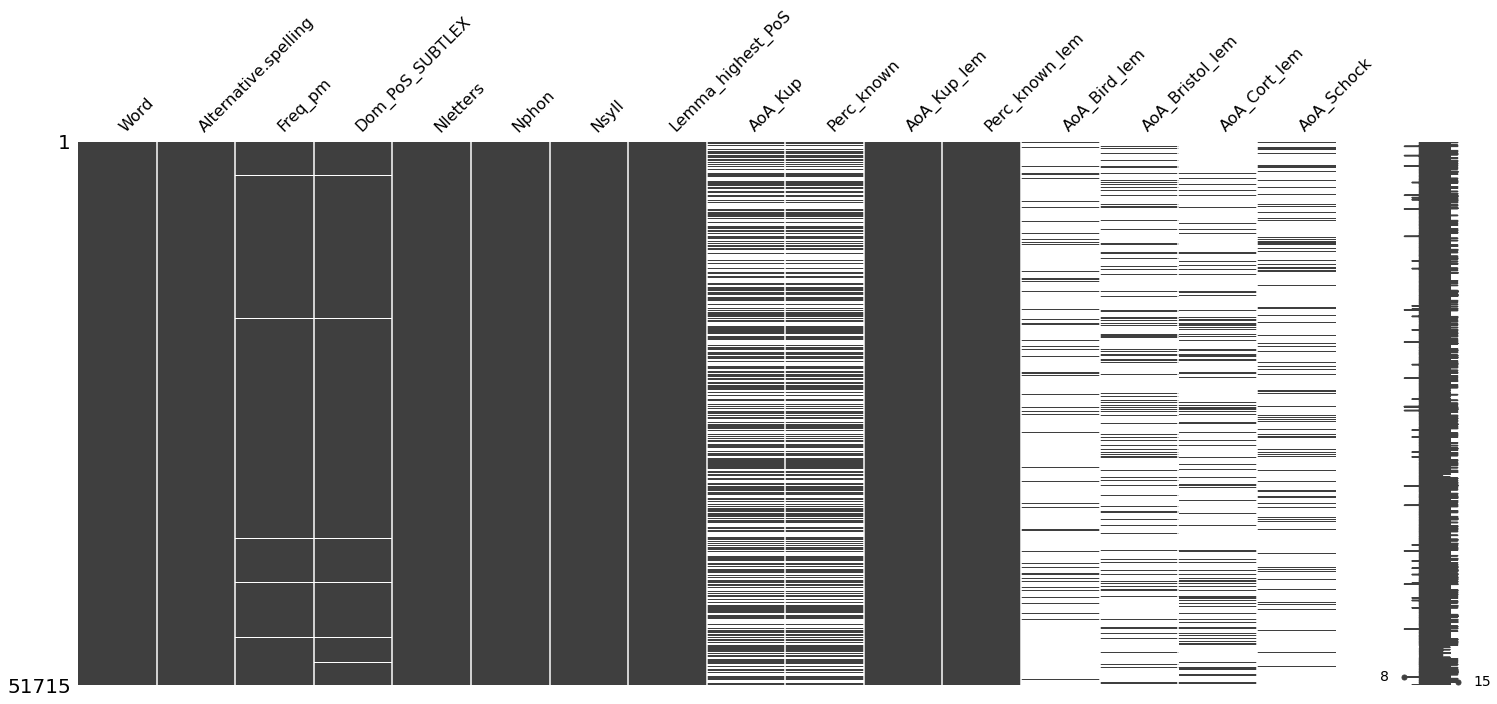

In [ ]:
msno.matrix(aoa_df)

In [25]:
aoa_df.describe(include='all')

,Word,Alternative.spelling,Freq_pm,Dom_PoS_SUBTLEX,Nletters,Nphon,Nsyll,Lemma_highest_PoS,AoA_Kup,Perc_known,AoA_Kup_lem,Perc_known_lem,AoA_Bird_lem,AoA_Bristol_lem,AoA_Cort_lem,AoA_Schock
count,51714,51714,51046.000000,50963,51715.000000,51715.000000,51715.000000,51714,31105.000000,31124.000000,51695.000000,51715.000000,5421.000000,8061.000000,8045.000000,7056.000000
unique,51714,51598,NaN,63,NaN,NaN,NaN,31131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,a,caesarean,NaN,Noun,NaN,NaN,NaN,do,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3,NaN,29419,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,17.200832,NaN,8.105269,6.939186,2.612898,NaN,11.000093,0.873222,10.361546,0.903680,7.406309,8.018825,7.484076,8.834994
std,NaN,NaN,389.901055,NaN,2.433709,2.354740,1.123857,NaN,3.044114,0.198467,3.108417,0.174285,2.248850,2.272728,2.441634,2.283707
min,NaN,NaN,0.000000,NaN,1.000000,1.000000,0.000000,NaN,1.580000,0.000000,1.580000,0.000000,3.150000,2.310000,1.980000,2.870000
25%,NaN,NaN,0.080000,NaN,6.000000,5.000000,2.000000,NaN,8.940000,0.830000,8.170000,0.890000,5.540000,6.200000,5.540000,7.110000
50%,NaN,NaN,0.270000,NaN,8.000000,7.000000,2.000000,NaN,11.170000,0.950000,10.500000,1.000000,7.120000,7.860000,7.150000,8.960000
75%,NaN,NaN,1.290000,NaN,10.000000,8.000000,3.000000,NaN,13.200000,1.000000,12.630000,1.000000,8.920000,9.660000,9.240000,10.600000


In [27]:
# Proof that lemmas have the same AoA score as their non-lemma words.
def check_aoa_lemma_difference(aoa_df):
  min_aoa = (aoa_df[['Lemma_highest_PoS', 'AoA_Kup_lem']]
          .sort_values('Lemma_highest_PoS')
          .groupby('Lemma_highest_PoS')
          .min())
  
  merge_df = (aoa_df[['Lemma_highest_PoS', 'AoA_Kup_lem']]
              .merge(min_aoa, how='left', left_on='Lemma_highest_PoS', right_index=True))

  return merge_df[merge_df.AoA_Kup_lem_x != merge_df.AoA_Kup_lem_y]

# Inconsistent words are either missing their lemma or missing the AoA score altogether.
# These should be dropped from the dataset, and the dataset should probably consist of the first
# occurence of the Lemma and the AoA score.
check_aoa_lemma_difference(aoa_df)

,Lemma_highest_PoS,AoA_Kup_lem_x,AoA_Kup_lem_y
442,actinium,NaN,NaN
1322,ambuscade,NaN,NaN
2306,ashlar,NaN,NaN
5095,bosky,NaN,NaN
6404,canaille,NaN,NaN
9004,compeer,NaN,NaN
9005,compeer,NaN,NaN
16000,europium,NaN,NaN
19065,gallimaufry,NaN,NaN
22498,hutment,NaN,NaN


### Wikipedia Training Dataset

In [ ]:
wiki_df_train

,original_text,label
0,There is manuscript evidence that Austen conti...,1
1,"In a remarkable comparative analysis , Mandaea...",1
2,"Before Persephone was released to Hermes , who...",1
3,Cogeneration plants are commonly found in dist...,1
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1
...,...,...
416763,A Duke Nukem 3D version has been sold for Xbox...,0
416764,"However , it is becoming replaced as a method ...",0
416765,There are hand gestures in both Hindu and Budd...,0
416766,"If it is necessary to use colors , try to choo...",0


In [ ]:
wiki_df_train.dtypes

original_text    object
label             int64
dtype: object

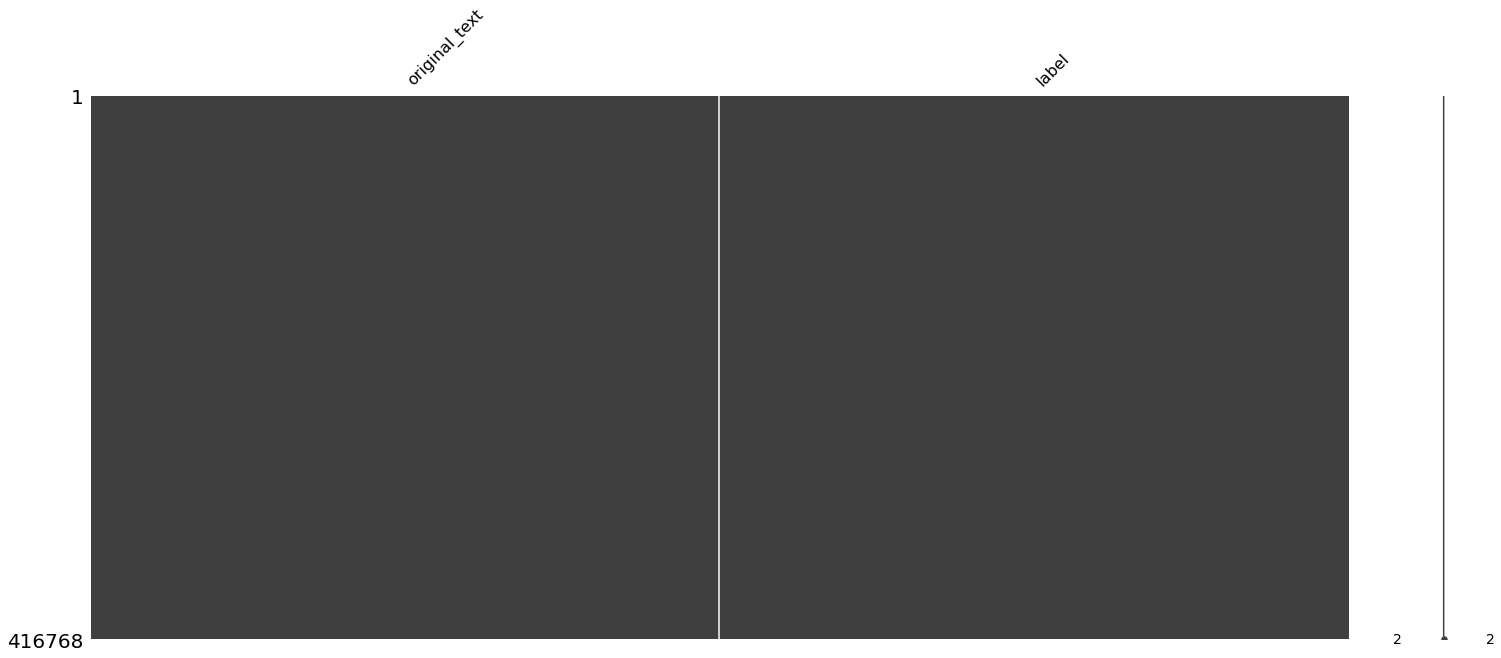

In [ ]:
msno.matrix(wiki_df_train)

In [28]:
# There are interesting duplicate values in this training corpus
wiki_df_train.describe(include='all')

,original_text,label
count,416768,416768.000000
unique,347356,NaN
top,References,NaN
freq,1051,NaN
mean,NaN,0.500000
std,NaN,0.500001
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.500000
75%,NaN,1.000000


In [ ]:
# Lets see how balanced our training dataset is
wiki_df_train.label.value_counts()
# Wow! Perfectly balanced

1    208384
0    208384
Name: label, dtype: int64

### Wikipedia Test Dataset

In [ ]:
wiki_df_test

,original_text
id,
0,-2011
1,-2011
2,-2000
3,-1997
4,1.636
...,...
119087,#NAME?
119088,#NAME?
119089,#NAME?


In [ ]:
wiki_df_test.dtypes

original_text    object
dtype: object

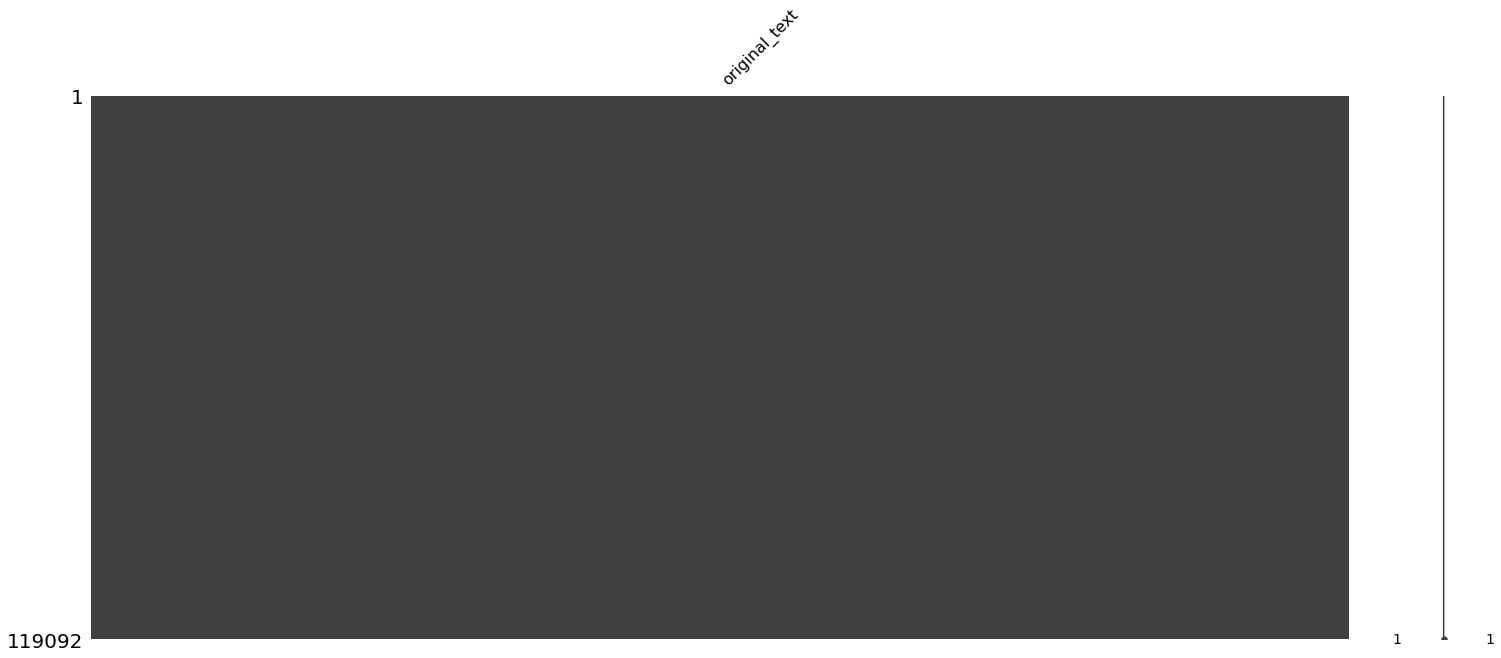

In [ ]:
msno.matrix(wiki_df_test)

In [29]:
# This dataset also contains duplicates
wiki_df_test.describe(include='all')

,original_text
count,119092
unique,110166
top,References
freq,333


### Sample Submission Labels

In [ ]:
# This dataset is is a sample submission of labels for the test dataset for the Kaggle competition
# It has no sparsity, and is simply one column and an index
sample_df.dtypes

label    int64
dtype: object

In [33]:
print('Sample submission df length:', len(sample_df))
print('\nUnique value counts\n', sample_df.value_counts())

Sample submission df length: 119092

Unique value counts
 label
1        59848
0        59244
dtype: int64
